# Scenario Script

*Author:* Devin McDonald

*Computing ID:* djm6cz

**Note: Scenario text taken from Final Project on Confluence (created by Rafael Alvarado)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from monte_carlo import Die
from monte_carlo import Game
from monte_carlo import Analyzer

## Scenario 1: A 2-headed coin

1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [2]:
fair_coin = Die(['H', 'T'])
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

*Example docstring (for change_weight method):*

In [3]:
print(unfair_coin.change_weight.__doc__)


        PURPOSE: change the weight of a single side of a die object
    
        INPUTS
        face_val     int, float, or string      
        new_weight   int or float 
    
        OUTPUT
        None 
        


2. Play a game of 1000 flips of three coins with all fair dice.

In [4]:
n_tosses = 1000

In [5]:
fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_play = fair_game.play(n_tosses)

3. Play a game of 1000 flips with two unfair dice and one fair die.

In [6]:
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_play = unfair_game.play(n_tosses)

4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

In [7]:
fair_analysis = Analyzer(fair_game)
fair_analysis.jackpot()

252

In [8]:
unfair_analysis = Analyzer(unfair_game)
unfair_analysis.jackpot()

321

5. Compute relative frequency as the number of jackpots over the total number of rolls.

In [9]:
fair_jp_freq = fair_analysis.jackpot() / n_tosses
unfair_jp_freq = unfair_analysis.jackpot() / n_tosses

6. Show your results, comparing the two relative frequencies, in a simple bar chart.

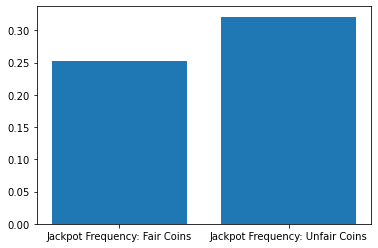

In [10]:
labels = ['Jackpot Frequency: Fair Coins', 'Jackpot Frequency: Unfair Coins'] 
freqs = [fair_jp_freq, unfair_jp_freq]

plt.bar(labels, freqs)
plt.show();

## Scenario 2: A 6-sided die

1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [11]:
fair_die = Die([1, 2, 3, 4, 5, 6])
unfair_die1 = Die([1, 2, 3, 4, 5, 6])
unfair_die2 = Die([1, 2, 3, 4, 5, 6])

In [12]:
unfair_die1.change_weight(6, 5)
unfair_die2.change_weight(1, 5)

*Example display of current faces and weights for unfair_die1 and unfair_die2*

In [13]:
unfair_die1.current_faces_and_weights()

,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [14]:
unfair_die2.current_faces_and_weights()

,faces,weights
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


2. Play a game of 10000 rolls with 5 fair dice.

In [15]:
n_rolls = 10000

In [16]:
fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_play = fair_game.play(n_rolls)

3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [17]:
unfair_game = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
unfair_play = unfair_game.play(n_rolls)

4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [18]:
fair_analysis = Analyzer(fair_game)
fair_analysis.jackpot()
fair_jp_freq = fair_analysis.jackpot() / n_rolls

In [19]:
unfair_analysis = Analyzer(unfair_game)
unfair_analysis.jackpot()
unfair_jp_freq = unfair_analysis.jackpot() / n_rolls

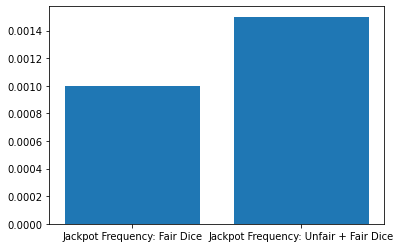

In [20]:
labels = ['Jackpot Frequency: Fair Dice', 'Jackpot Frequency: Unfair + Fair Dice'] 
freqs = [fair_jp_freq, unfair_jp_freq]

plt.bar(labels, freqs)
plt.show();

5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

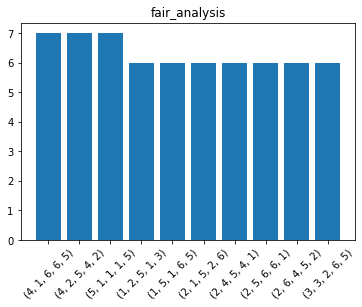

In [21]:
fair_analysis.combo()
labels = fair_analysis.combo_df.nlargest(n=10, columns=['count'])['faces'].to_numpy()
labels = [str(x) for x in labels]
counts = fair_analysis.combo_df.nlargest(n=10, columns=['count'])['count'].to_numpy()

plt.title('fair_analysis') 
plt.bar(labels, counts)
plt.xticks(rotation = 45);

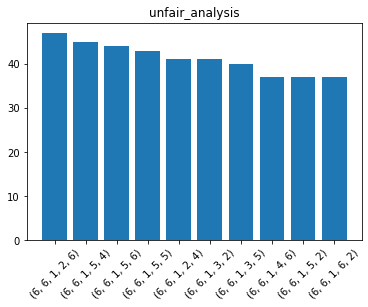

In [22]:
unfair_analysis.combo()
labels = unfair_analysis.combo_df.nlargest(n=10, columns=['count'])['faces'].to_numpy()
labels = [str(x) for x in labels]
counts = unfair_analysis.combo_df.nlargest(n=10, columns=['count'])['count'].to_numpy()

plt.title('unfair_analysis') 
plt.bar(labels, counts)
plt.xticks(rotation = 45);

## Scendario 3: Letters of the Roman Alphabet

1. Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [23]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
            'h', 'i', 'j', 'k', 'l', 'm', 'n', 
            'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']

In [24]:
weights = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705,
           3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 
           7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308,
           1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

In [25]:
ab_die = Die(alphabet)

In [26]:
for i in range(26):
    ab_die.change_weight(alphabet[i], weights[i])

In [27]:
ab_die.current_faces_and_weights().head()

,faces,weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607


2. Play a game involving 5 of these dice with 1000 rolls.

In [28]:
n_rolls = 1000

In [29]:
word_game = Game([ab_die] * 5)

In [30]:
word_play = word_game.play(n_rolls)

In [31]:
word_analysis = Analyzer(word_game)
word_analysis.combo()
word_analysis.combo_df.head()

,faces,count
combo 1,"(a, a, a, a, b)",1
combo 2,"(a, a, a, l, e)",1
combo 3,"(a, a, a, u, i)",1
combo 4,"(a, a, c, m, l)",1
combo 5,"(a, a, e, i, p)",1


3. How many combos can you that look like actual English words?

*In order to make this slightly more thorough, I went about this by importing / downloading words from nltk.corpus. I then compared my 5 letter combinations to actual 5 letter words from nltk.corpus.*

In [32]:
import nltk
from nltk.corpus import words
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/devinmcdonald/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [33]:
possible_words = []
for i in word_analysis.combo_df['faces']:
    possible_word = ''.join(i)
    possible_words.append(possible_word)  

In [34]:
five_letter_words = [x for x in words.words() if len(x) == 5]
real_words = [i for i in possible_words if i in five_letter_words]
real_words

['cocoa', 'farde', 'inset', 'stipe']

In [35]:
real_word_frequency = len(real_words) / n_rolls
real_word_frequency

0.004

4. Based on your eye count, what is the relative frequency of these words versus the rest?

*Based on my eye count, the relative frequency of these words versus the rest often came out to be 0.001, which is is typically less than the previouly shown method's frequency.*

*However, the frequency of words that **look** like English words typically ranged from a frequency of 0.001-0.01.*

*One can return a random sample from possible_words using the following code:*

`import random`

`print([x for x in random.sample(possible_words, 50)])`